In [2]:
import pandas as pd

# Load the CSV file
file_path = 'sourcedata/sub-01_task-targets_events.csv'  # Replace with your file path
eeg_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(eeg_data.head())

   eventnumber  index  sequencenumber  yokedsequencenumber  istarget  \
0            0   1057               0                    5         0   
1            1   1058               0                    5         0   
2            2   1059               0                    5         0   
3            3   1060               0                    5         0   
4            4   1061               0                    5         0   

   presentationnumber  stimnumber                           stim  response  \
0                   0           4      stimuli_orig\Bicycle1.jpg         0   
1                   1          30   stimuli_orig\Horse3_body.jpg         0   
2                   2           6       stimuli_orig\Cactus1.jpg         0   
3                   3          36  stimuli_orig\Monkey3_face.jpg         0   
4                   4          51    stimuli_orig\Wolf3_body.jpg         0   

   correct  rt          stimname  time_stimon  time_stimoff   stimdur  
0        0   0      Bicycl

In [3]:
# Check the column names and data types
print(eeg_data.info())

# Check for missing values
print(eeg_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8446 entries, 0 to 8445
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   eventnumber          8446 non-null   int64  
 1   index                8446 non-null   int64  
 2   sequencenumber       8446 non-null   int64  
 3   yokedsequencenumber  8446 non-null   int64  
 4   istarget             8446 non-null   int64  
 5   presentationnumber   8446 non-null   int64  
 6   stimnumber           8446 non-null   int64  
 7   stim                 8446 non-null   object 
 8   response             8446 non-null   int64  
 9   correct              8446 non-null   int64  
 10  rt                   8446 non-null   int64  
 11  stimname             8446 non-null   object 
 12  time_stimon          8446 non-null   float64
 13  time_stimoff         8446 non-null   float64
 14  stimdur              8446 non-null   float64
dtypes: float64(3), int64(10), object(2)
me

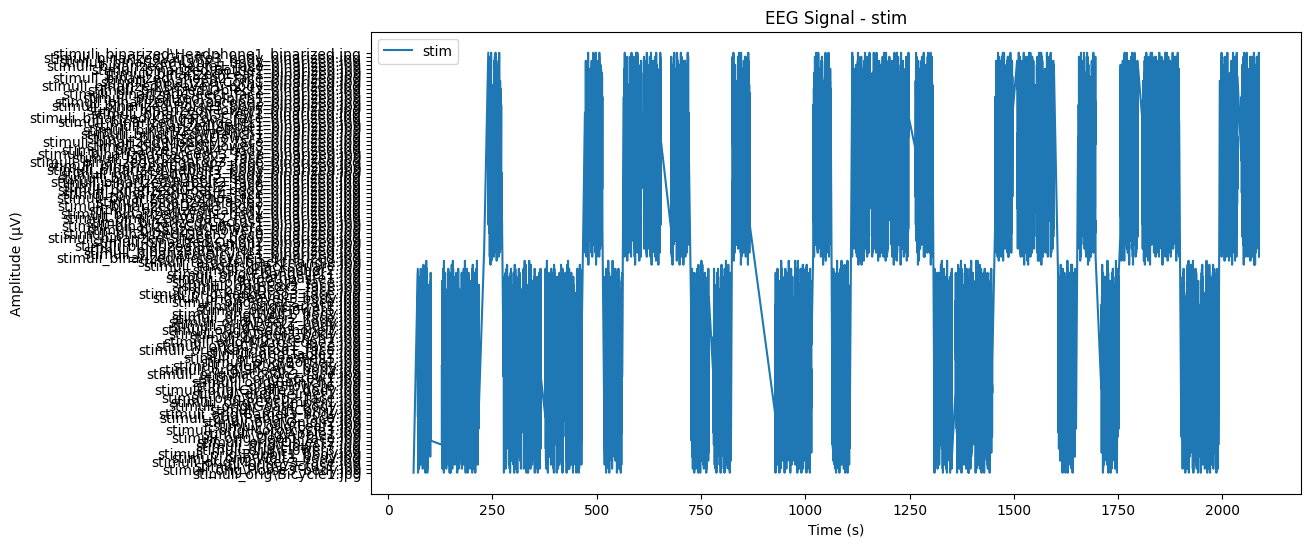

In [4]:
import matplotlib.pyplot as plt

# Plot a single EEG channel
channel_name = 'stim'  # Replace with the name of a channel in your dataset
plt.figure(figsize=(12, 6))
plt.plot(eeg_data['time_stimon'], eeg_data[channel_name], label=channel_name)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.title(f'EEG Signal - {channel_name}')
plt.legend()
plt.show()

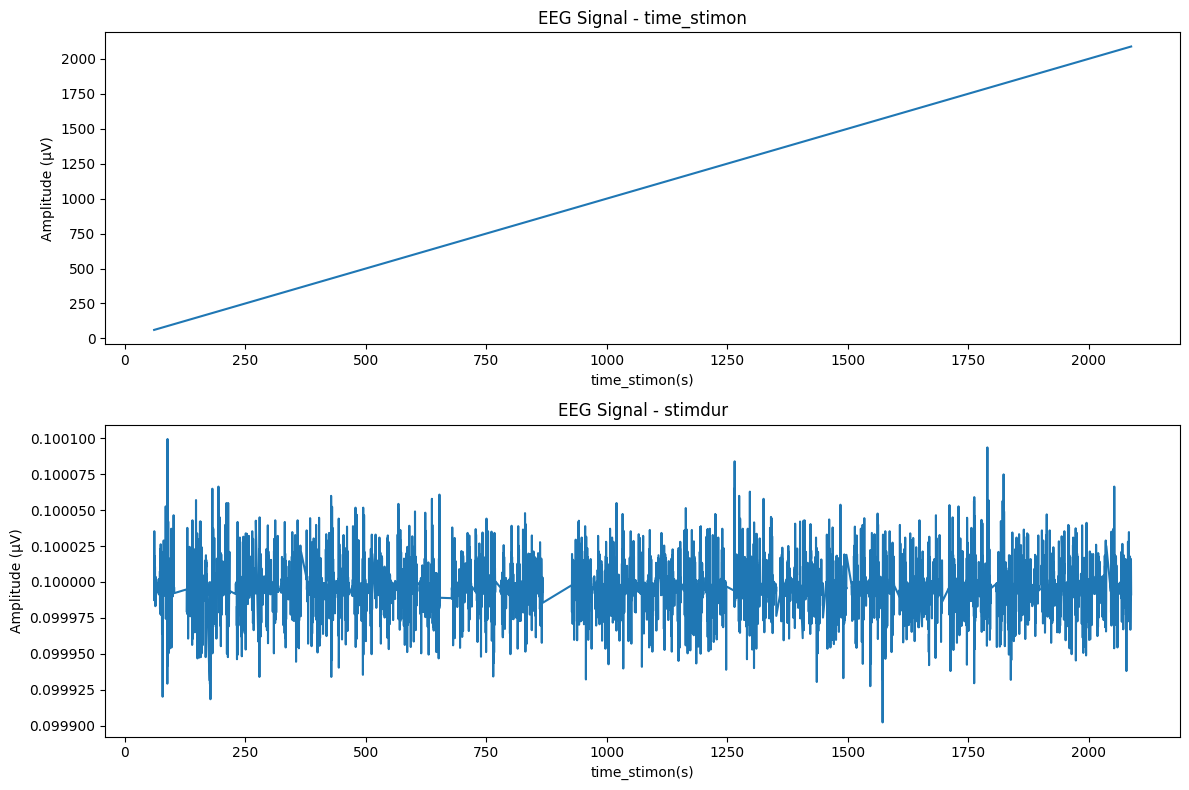

In [5]:
channels = ['time_stimon', 'stimdur']  # Replace with the names of your EEG channels
plt.figure(figsize=(12, 8))

for i, channel in enumerate(channels):
    plt.subplot(len(channels), 1, i + 1)
    plt.plot(eeg_data['time_stimon'], eeg_data[channel], label=channel)
    plt.xlabel('time_stimon(s)')
    plt.ylabel('Amplitude (µV)')
    plt.title(f'EEG Signal - {channel}')
    plt.tight_layout()

plt.show()

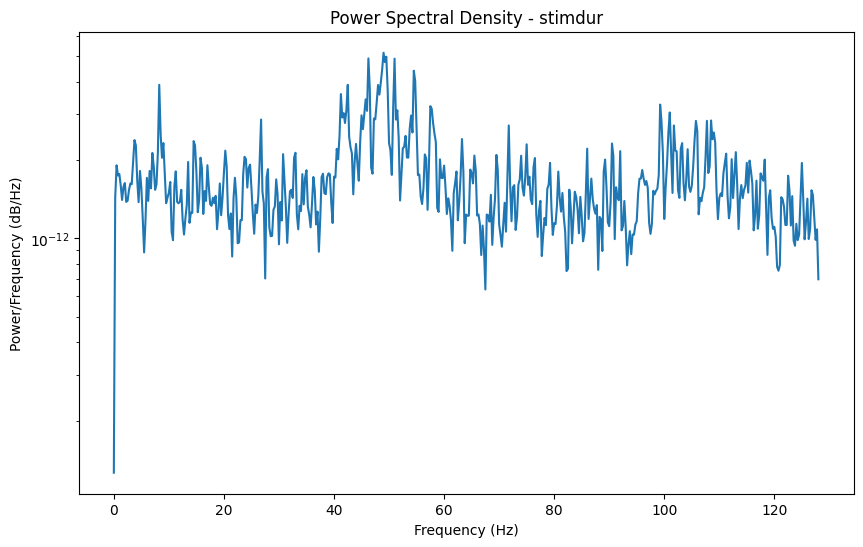

In [6]:
from scipy.signal import welch

# Compute and plot the Power Spectral Density (PSD) for a single channel
channel_name = 'stimdur'  # Replace with your channel name
fs = 256  # Sampling frequency (Hz) - replace with your dataset's sampling rate

frequencies, psd = welch(eeg_data[channel_name], fs, nperseg=1024)

plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd)
plt.title(f'Power Spectral Density - {channel_name}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show()